**Recursive inverse**

In [5]:
from common import *
from inversion import *
import time
import tracemalloc
from multiplication import strassen, binet
benchmark_size = 100
step = 10

In [6]:
add_counters = []
sub_counters = []
mul_counters = []
time_counters = []
mem_counters = []

In [ ]:
for n in range(1, benchmark_size + 1, step):
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    start_time = time.time()
    C = recursive_inverse(A, binet)
    end_time = time.time()
    
    time_counters.append(end_time - start_time)
    reset_counters()

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


In [8]:
for n in range(1, benchmark_size + 1, step):
    common.reset_counters()
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    C = recursive_inverse(A, binet)
    
    add_counters.append(common.counter_add)
    mul_counters.append(common.counter_mul)
    sub_counters.append(common.counter_sub)

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


In [10]:
memory_counters = []

for n in range(1, benchmark_size + 1, step):
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    tracemalloc.start()
    C = recursive_inverse(A, binet)
    
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    mem_counters.append(peak / 10**6)

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


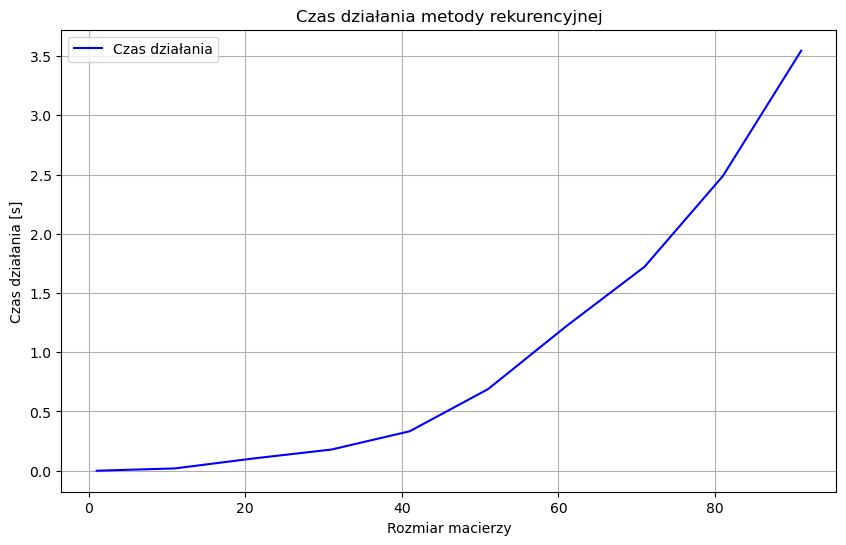

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_counters)*step + 1, step), time_counters, label="Czas działania", color='blue')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas działania [s]")
plt.title("Czas działania metody rekurencyjnej")
plt.legend()
plt.grid(True)
plt.show()


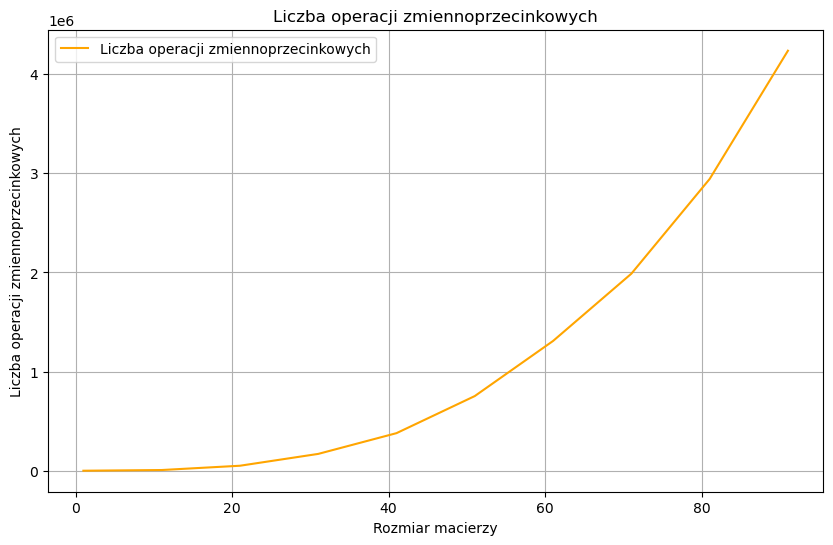

In [12]:
zmiennop = [add + sub + mul for add, sub, mul in zip(add_counters, sub_counters, mul_counters)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(zmiennop)*step + 1, step), zmiennop, label="Liczba operacji zmiennoprzecinkowych", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji zmiennoprzecinkowych")
plt.title("Liczba operacji zmiennoprzecinkowych")
plt.legend()
plt.grid(True)
plt.show()

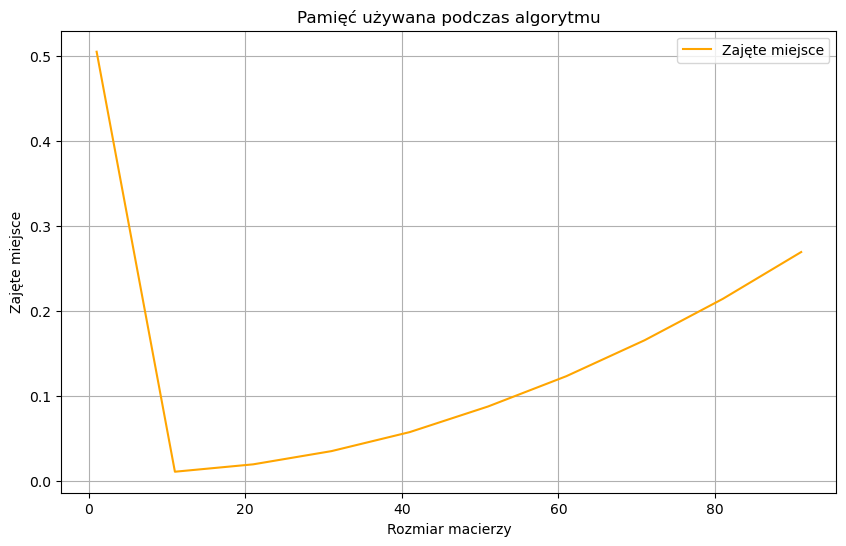

In [13]:
# Wykres 2: Liczba zajętej pamięci
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mem_counters)*step + 1, step), mem_counters, label="Zajęte miejsce", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Zajęte miejsce")
plt.title("Pamięć używana podczas algorytmu")
plt.legend()
plt.grid(True)
plt.show()

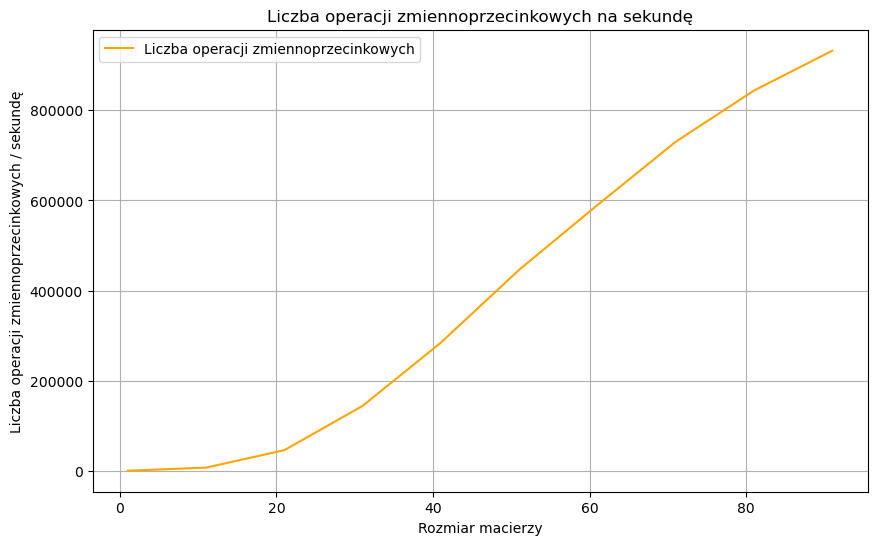

In [14]:
zmiennop = [(add + sub + mul) / (t+1) for add, sub, mul, t in zip(add_counters, sub_counters, mul_counters, time_counters)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(zmiennop)*step + 1, step), zmiennop, label="Liczba operacji zmiennoprzecinkowych", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji zmiennoprzecinkowych / sekundę")
plt.title("Liczba operacji zmiennoprzecinkowych na sekundę")
plt.legend()
plt.grid(True)
plt.show()